# Project: Investigate IMDB dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [19]:
# loading the IMDB dataset
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
df.shape

(10866, 21)

In [11]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [21]:
df.drop(['id', 'imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date'], axis=1, inplace=True)

In [22]:
df.head()

,popularity,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
popularity      10866 non-null float64
genres          10843 non-null object
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 594.3+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b3b1067f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2b3afb9320>]], dtype=object)

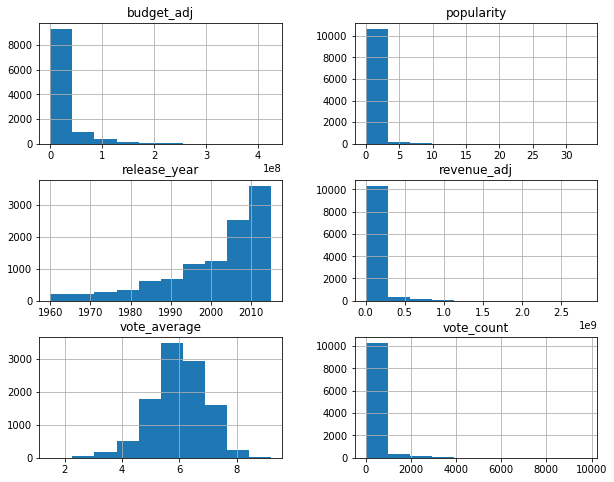

In [25]:
df.hist(figsize=(10,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b3acbb048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2b3adfbda0>]], dtype=object)

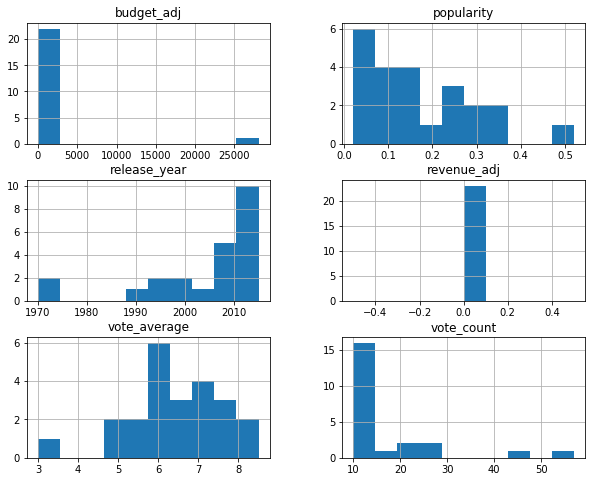

In [27]:
df[df.genres.isnull()].hist(figsize=(10,8))

In [30]:
# drop the rows with missing genres, as we have to do most of the analysis on genres.
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 7 columns):
popularity      10843 non-null float64
genres          10843 non-null object
vote_count      10843 non-null int64
vote_average    10843 non-null float64
release_year    10843 non-null int64
budget_adj      10843 non-null float64
revenue_adj     10843 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 677.7+ KB


<a id='eda'></a>
## Exploratory Data Analysis for IMDB data set

### Research Question 1 
How are budgets and revenues trending over time?

In [37]:
df.groupby('release_year').mean()

,popularity,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,
1960,0.458932,77.531250,6.325000,5.082036e+06,3.340991e+07
1961,0.422827,77.580645,6.374194,1.085687e+07,7.947167e+07
1962,0.454783,74.750000,6.343750,1.232693e+07,4.856238e+07
1963,0.502706,82.823529,6.329412,1.535687e+07,3.924580e+07
1964,0.412428,74.690476,6.211905,6.608980e+06,5.707603e+07
1965,0.342587,52.000000,6.194286,1.388168e+07,9.057670e+07
1966,0.304112,31.739130,6.128261,8.405522e+06,1.237527e+07
1967,0.471154,77.550000,6.242500,1.644849e+07,1.205763e+08
1968,0.484202,108.128205,6.379487,1.156367e+07,4.255388e+07


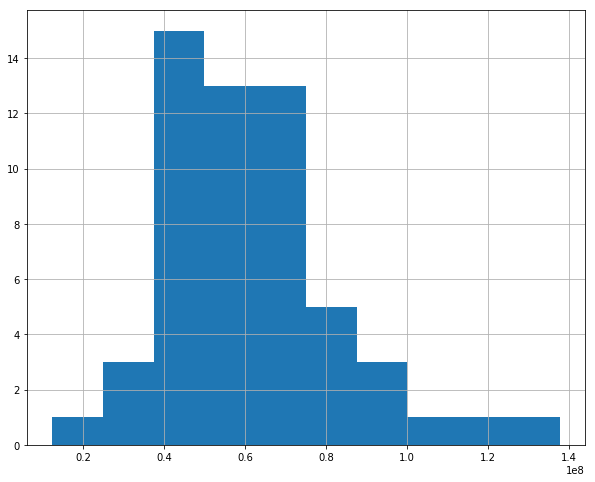

In [40]:
df.groupby('release_year').mean()['revenue_adj'].hist(figsize=(10,8));

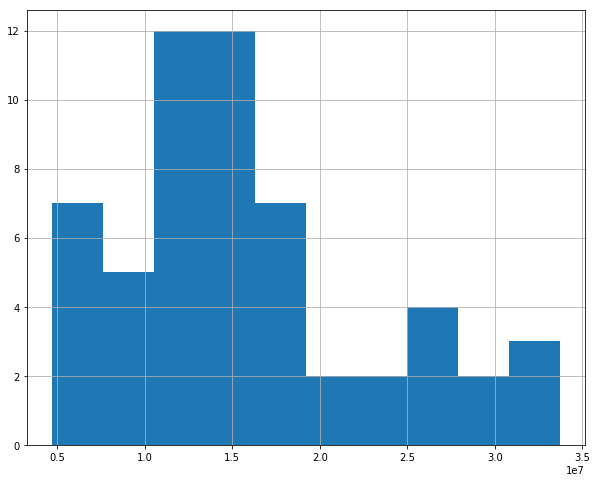

In [42]:
df.groupby('release_year').mean()['budget_adj'].hist(figsize=(10,8));

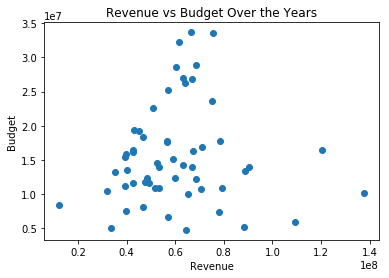

In [43]:
df_year_mean = df.groupby('release_year').mean()
plt.scatter(x=df_year_mean['revenue_adj'], y=df_year_mean['budget_adj']);
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.title('Revenue vs Budget Over the Years');

Looking at the above trend we say that generally movies with high budget earn good revenue, though there are a few outliers.

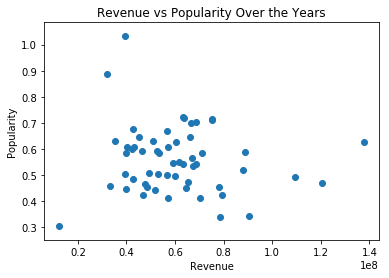

In [51]:
plt.scatter(x=df_year_mean['revenue_adj'], y=df_year_mean['popularity']);
plt.xlabel('Revenue')
plt.ylabel('Popularity')
plt.title('Revenue vs Popularity Over the Years');

Looking at the above trend we can say that though popular movies earn good revenues, there are a few ouliers 

### Research Question 2 
What features are related with higher revenues?

In [58]:
df.corr(method='pearson')

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.800786,0.210426,0.090195,0.513306,0.608962
vote_count,0.800786,1.000000,0.254703,0.108261,0.586913,0.707865
vote_average,0.210426,0.254703,1.000000,-0.119907,0.093771,0.193859
release_year,0.090195,0.108261,-0.119907,1.000000,0.017098,-0.066138
budget_adj,0.513306,0.586913,0.093771,0.017098,1.000000,0.646488
revenue_adj,0.608962,0.707865,0.193859,-0.066138,0.646488,1.000000


As seen above:

revenue and popularity are positively related :0.608962<br>
revenue and vote counts are positively related :0.707865

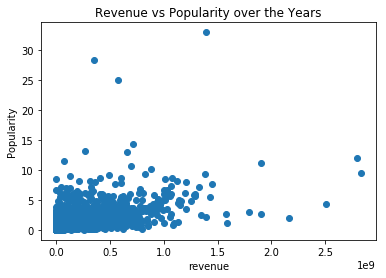

In [60]:
plt.scatter(x=df['revenue_adj'], y=df['popularity']);
plt.xlabel('revenue')
plt.ylabel('Popularity')
plt.title('Revenue vs Popularity over the Years');

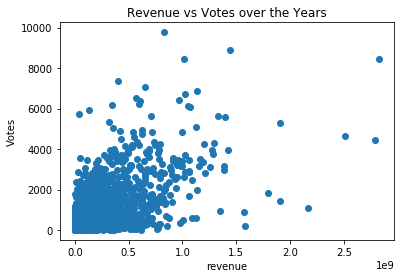

In [61]:
plt.scatter(x=df['revenue_adj'], y=df['vote_count'])
plt.xlabel('revenue')
plt.ylabel('Votes')
plt.title('Revenue vs Votes over the Years');

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])